<a href="https://colab.research.google.com/github/jronald88/Time_series_alt/blob/main/time_series_alt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**All Imports**

In [1]:
!pip install colorama==0.4.6

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
import missingno as msno
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore
import datetime
from datetime import date
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima


import warnings
warnings.filterwarnings('ignore')



In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

In [5]:
df = pd.read_csv(url)

#**Data Inspection**

In [6]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [7]:
df.shape

(366, 2)

In [8]:
df.isnull().sum()

,0
date,0
sales,0


#**Cleaning the data and EDA**


In [9]:
df.index
# index already set as date.

RangeIndex(start=0, stop=366, step=1)

In [10]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [11]:
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


#**Step 2: Construct and analyze the time series**

Construct the valid data structure for the time serie, graph it, and then analyze it and answer the following questions:

Which is the tensor of the time serie?
Which is the trend?
Is it stationary?
Is there variability or noise?

Note: A tensor in a time serie is the minimum unit of time for which there is data. It can be every second, minute, hour, day, week, month...

In [12]:
ts = df.sales

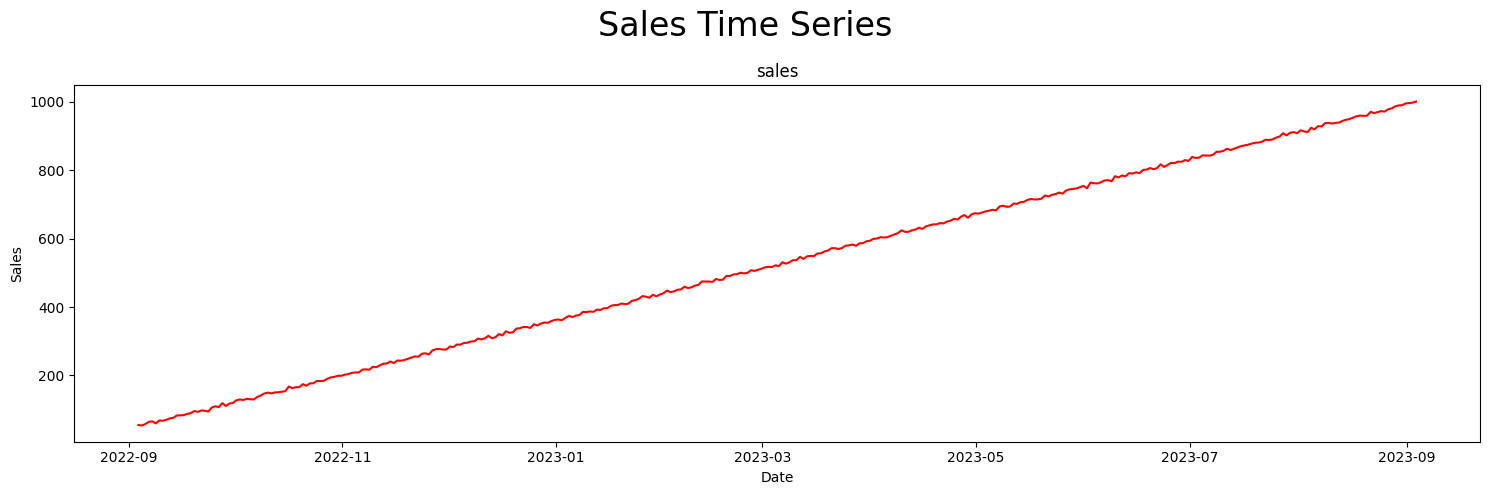

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), sharex=True)
fig.suptitle('Sales Time Series', fontsize=24)
sns.lineplot(x=df.index, y=df.sales.fillna(method='ffill'), color = 'red')
ax.set_title('sales')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
#plt.xticks([])
plt.tight_layout()

plt.show()

In [14]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

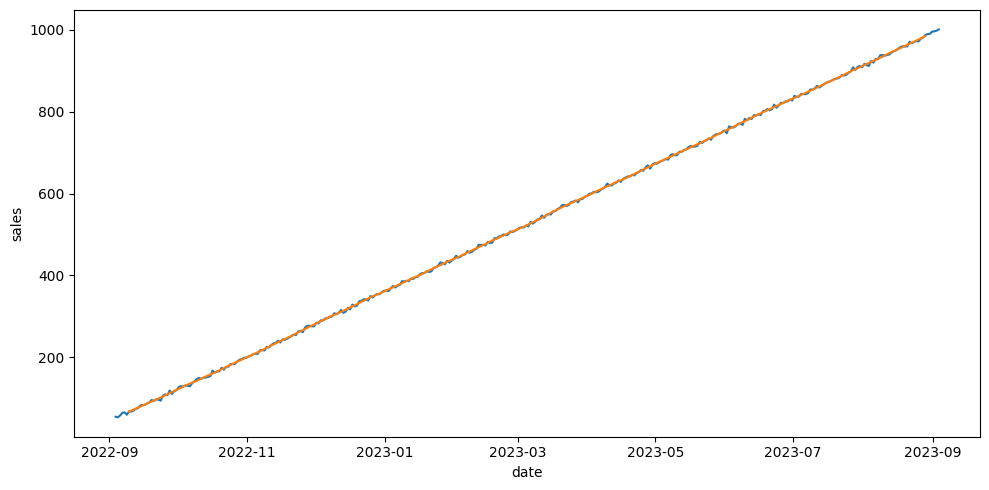

In [15]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

In [16]:
df = df.sort_index()

In [17]:
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


In [18]:
df.index.inferred_freq

'D'

In [19]:
time_span = df.index.max() - df.index.min()
time_span

Timedelta('365 days 00:00:00')

In [20]:
len(df)

366

Given the intervals are one less than the number of elements in the df, there are no gaps in the time series

<Axes: >

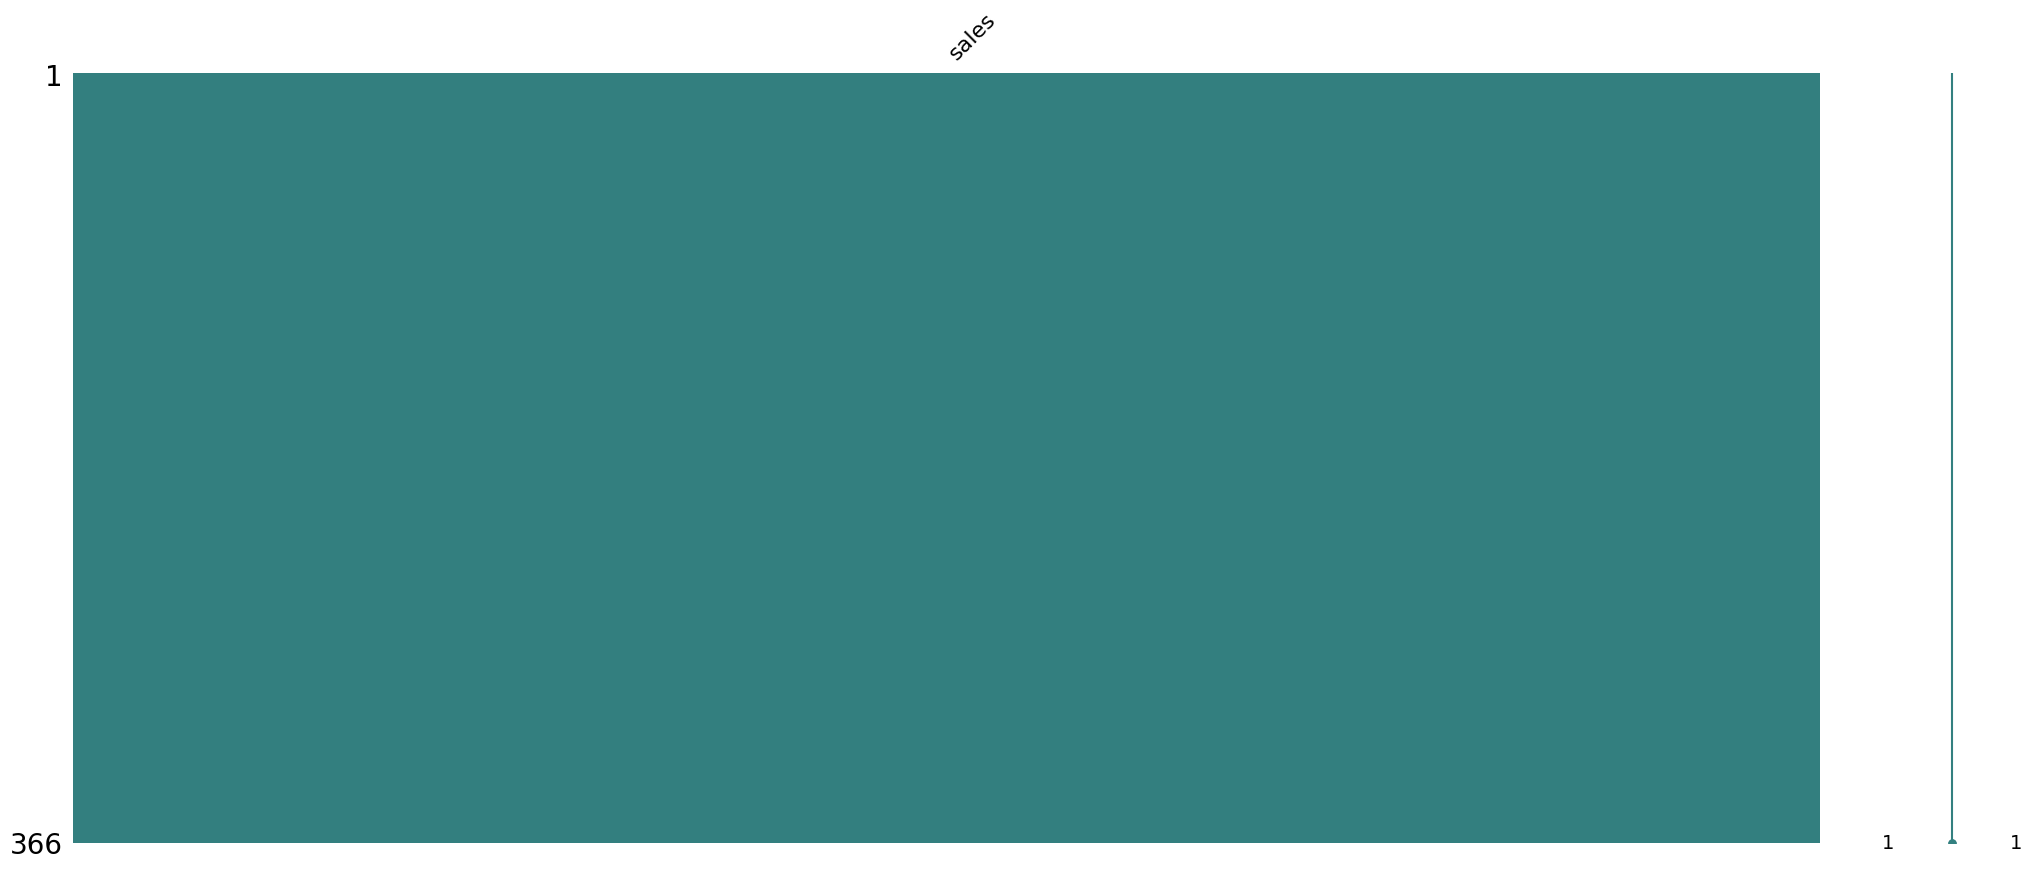

In [21]:
msno.matrix(df, color=(0.2,0.5,0.5))

In [22]:
model = SimpleExpSmoothing(ts).fit(smoothing_level=0.5)  # Adjust smoothing_level as needed


In [23]:
dampened_data = model.fittedvalues

<Axes: xlabel='date'>

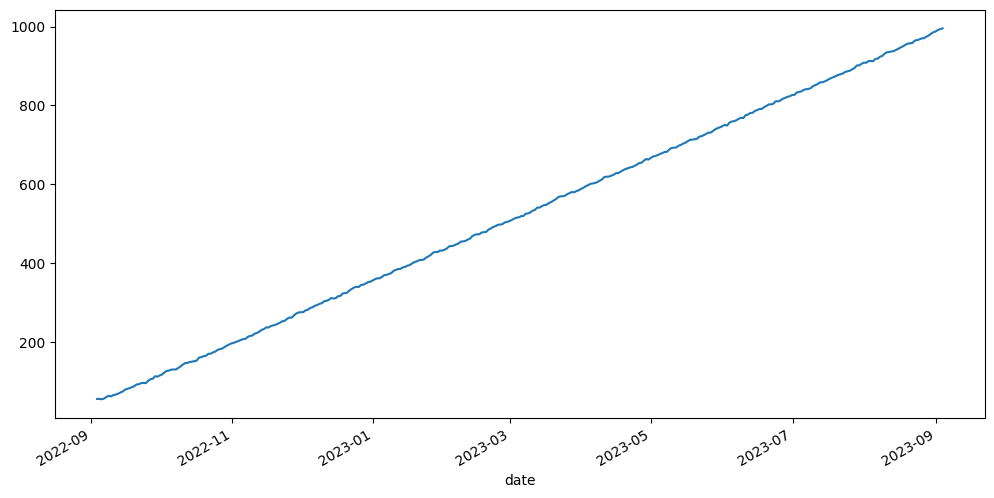

In [24]:
dampened_data.plot(figsize=(12, 6))

#**Test for Stationality**

In [25]:
result = adfuller(df['sales'].values)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064


p-value is greater than 0.05, which means our null hypothesis cannot be rejected and the series is non stationary

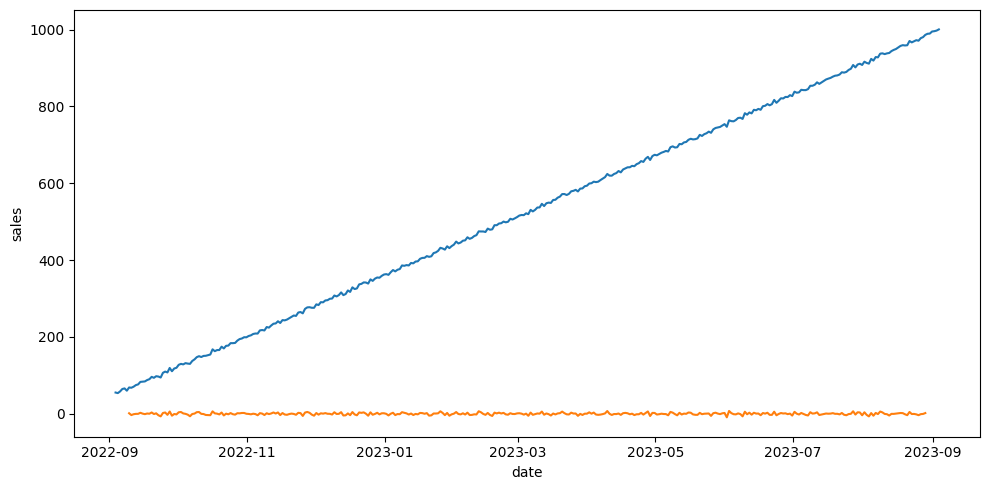

In [26]:

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

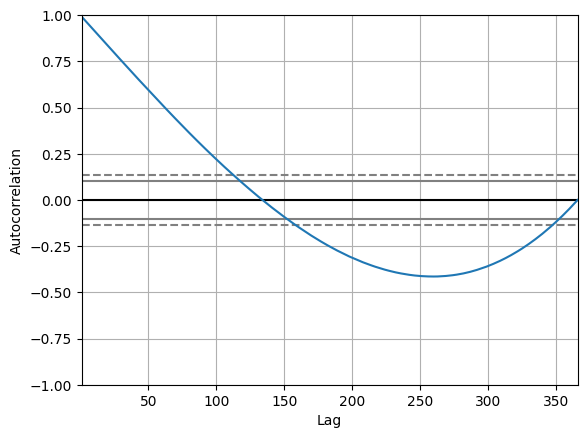

In [27]:
autocorrelation_plot(df['sales'])

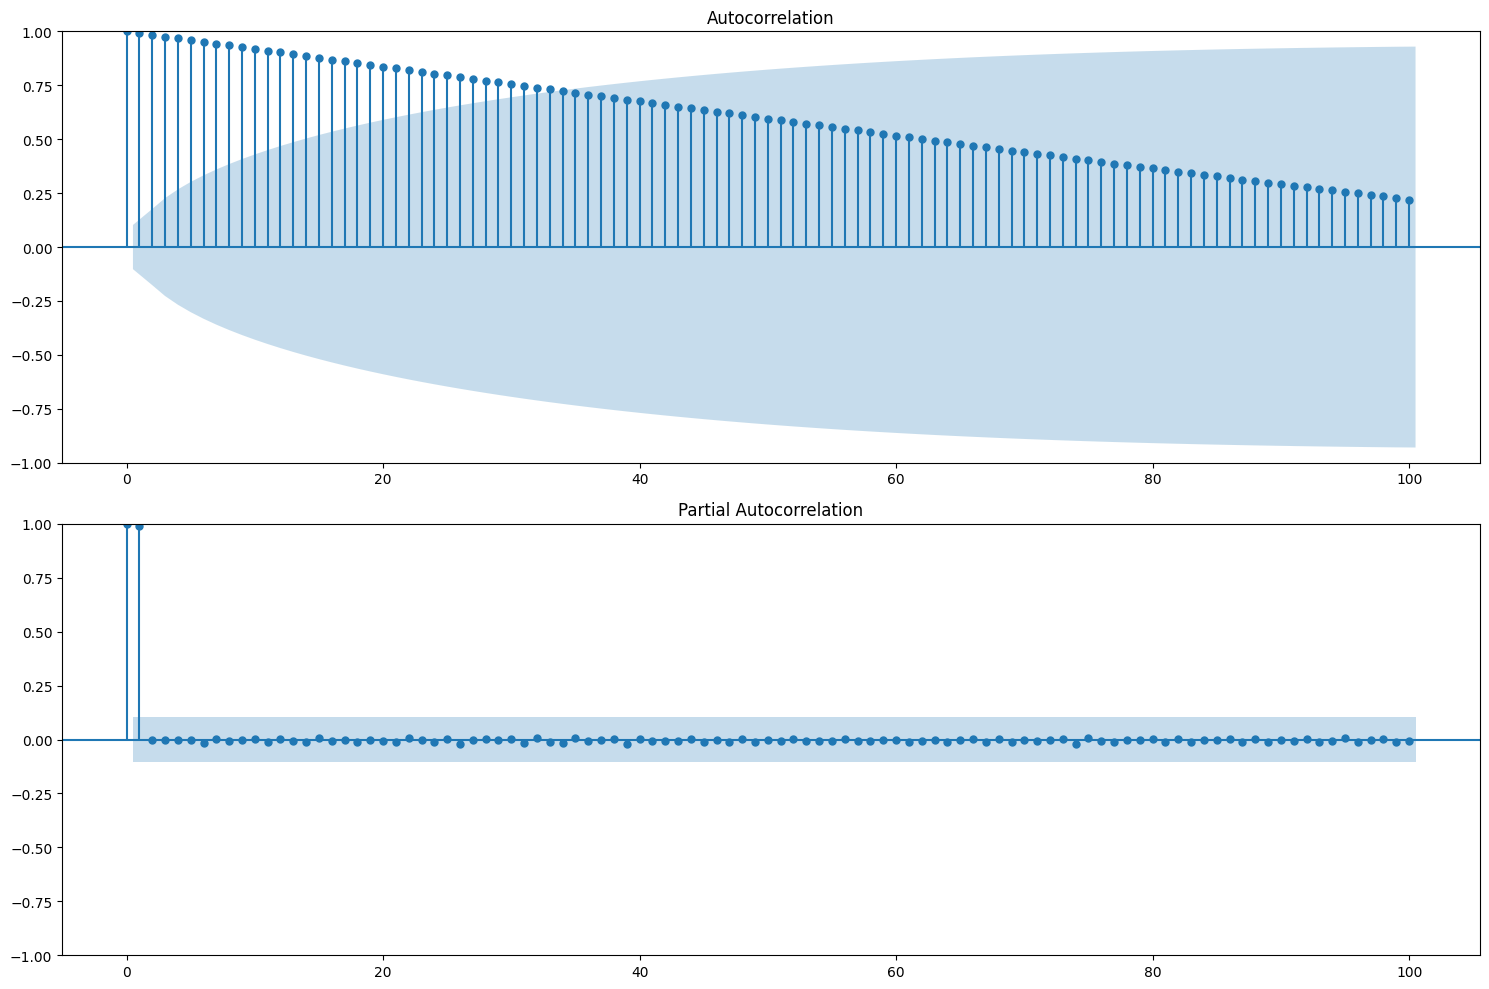

In [28]:
fix, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))

plot_acf(ts, lags = 100, ax = ax[0])
plot_pacf(ts, lags = 100, ax = ax[1])
plt.tight_layout()

plt.show()

In [29]:
ts_stationary = ts.diff().dropna()

In [30]:
result2 = adfuller(ts_stationary)
print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

ADF Statistic: -9.430263118334729
p-value: 5.212954111417404e-16


Series is now stationary, so we can apply auto ARIMA method:

In [39]:
model = auto_arima(ts,seasonal = False, trace=True, with_trend = True, m = 12)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.184, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=1.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.900 seconds


In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Fri, 04 Oct 2024   AIC                           1839.552
Time:                        08:30:01   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
forecast = model.predict(60)
forecast

,0
2023-09-04 17:10:08.079328,1002.158148
2023-09-05 17:10:08.079328,1004.831669
2023-09-06 17:10:08.079328,1007.423289
2023-09-07 17:10:08.079328,1010.021630
2023-09-08 17:10:08.079328,1012.619419
2023-09-09 17:10:08.079328,1015.217254
2023-09-10 17:10:08.079328,1017.815084
2023-09-11 17:10:08.079328,1020.412915
2023-09-12 17:10:08.079328,1023.010746
2023-09-13 17:10:08.079328,1025.608577


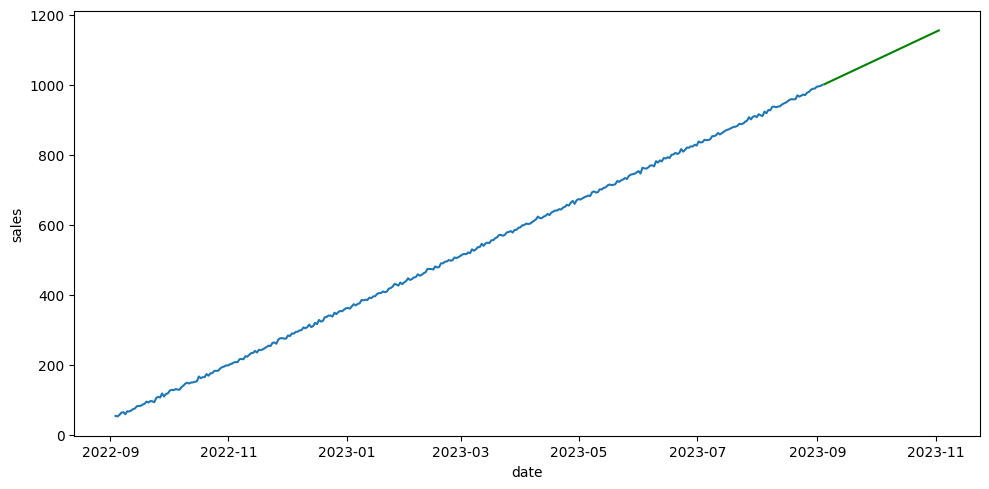

In [43]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()